In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [6]:
diabetes=pd.read_csv("D:\datasets\diabetes.csv")
dataframe=diabetes

In [20]:
dataframe.shape

(768, 9)

In [8]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print(dataframe.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [23]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
numericVar = dataframe.columns[:-1]

In [42]:
for itr in numericVar:
    count=0
    for jtr in dataframe[itr]:
        if(jtr==0.0):
            count+=1
    
    print("Zero values in {} are {}".format(itr,count))

Zero values in Pregnancies are 0
Zero values in Glucose are 0
Zero values in BloodPressure are 0
Zero values in SkinThickness are 0
Zero values in Insulin are 0
Zero values in BMI are 0
Zero values in DiabetesPedigreeFunction are 0
Zero values in Age are 0


In [43]:
for itr in numericVar:
    dataframe[itr]=dataframe[itr].replace(0,np.NaN)
    med=int(dataframe[itr].median(skipna=True))
    dataframe[itr]=dataframe[itr].replace(np.NaN,med)

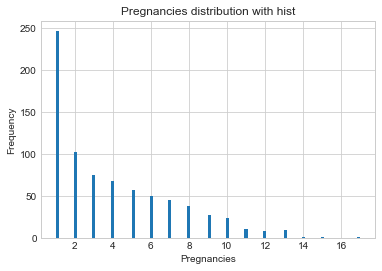

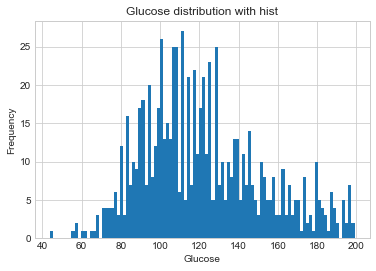

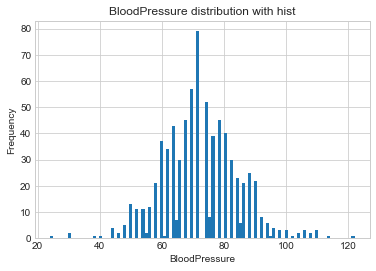

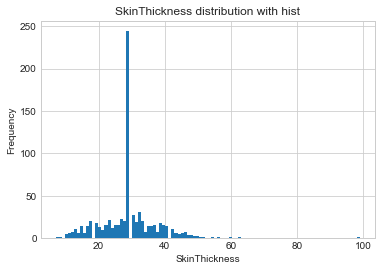

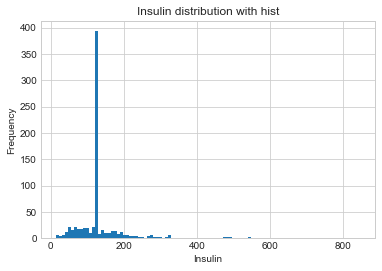

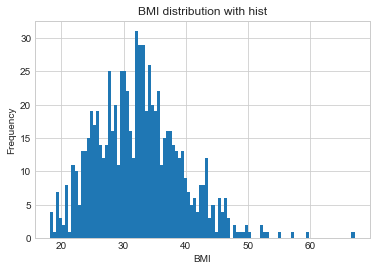

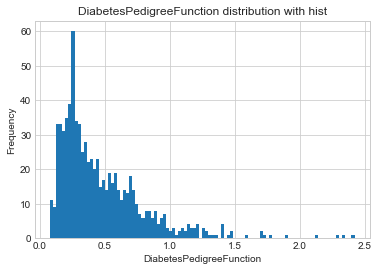

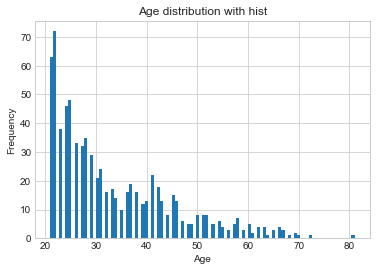

In [44]:
for itr in numericVar:
    plt.hist(dataframe[itr], bins = 100)
    plt.xlabel(itr)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(itr))
    plt.show()

In [45]:
x=dataframe.drop('Outcome',axis=1)
y=dataframe['Outcome']


In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)

In [81]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

# knn algorithm


In [83]:
k=int(math.sqrt(len(y_test)))
if (k%2==0):
    k+=1
print(k)

13


In [84]:
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [85]:
ypred=model.predict(x_test)

In [86]:
accuracy_score(y_test,ypred)

0.765625

In [87]:
confusion_matrix(y_test,ypred)

array([[109,  12],
       [ 33,  38]], dtype=int64)

In [88]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       121
           1       0.76      0.54      0.63        71

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.76      0.77      0.75       192

